# Filtering and Fourier spectrum
This example demonstrates the computation of the Fourier spectrum and different filtering options.

In [1]:
import numpy as np
import eqsig
import matplotlib.pyplot as plt


## Create an AccSignal object
The AccSignal object is a convenient way to handle different properties of a ground motion


In [2]:
acc_record_filename = 'test_motion_dt0p01.txt'
acc = np.loadtxt(acc_record_filename, skiprows=2)
dt = 0.01
asig = eqsig.AccSignal(acc, dt, label='name_of_record')


## Produce Fourier spectrum and smoothed Fourier spectrum
Smoothed Fourier spectrum is computed using function defined by Konno and Omachi (1998)

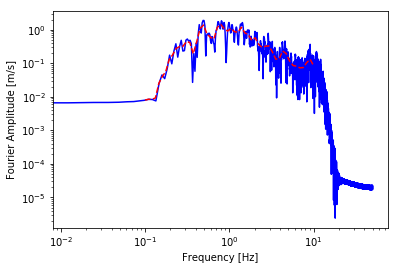

In [7]:
plt.plot(asig.fa_frequencies, abs(asig.fa_spectrum), c='b')
asig.smooth_fa_frequencies = np.logspace(-1, 1, 50)
plt.loglog(asig.smooth_fa_frequencies, asig.smooth_fa_spectrum, c='r', ls='--')
plt.xlabel('Frequency [Hz]')
lab = plt.ylabel('Fourier Amplitude [m/s]')


## Filter record using Butterworth filter

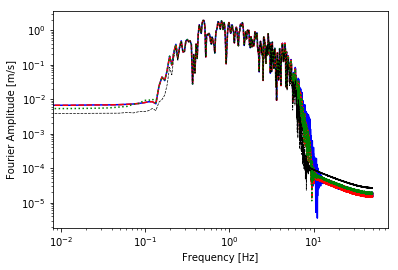

In [15]:
plt.plot(asig.fa_frequencies, abs(asig.fa_spectrum), c='b')
asig.butter_pass((None, 8))  # Low pass filter at 8Hz (default 4th order)
plt.plot(asig.fa_frequencies, abs(asig.fa_spectrum), c='r', ls='--')
asig.butter_pass((0.1, None), filter_order=4)  # High pass filter at 0.1Hz (default 4th order)
plt.plot(asig.fa_frequencies, abs(asig.fa_spectrum), c='g', ls=':')
asig.butter_pass((0.2, 6))  # Band pass filter at 0.2 and 6Hz (default 4th order)
plt.loglog(asig.fa_frequencies, abs(asig.fa_spectrum), c='k', ls='--', lw=0.7)
plt.xlabel('Frequency [Hz]')
lab = plt.ylabel('Fourier Amplitude [m/s]')


## Detrend a record

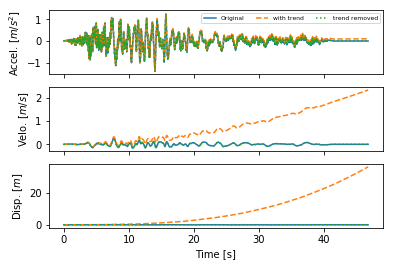

In [13]:
bf, sps = plt.subplots(nrows=3, sharex='col')
asig = eqsig.load_asig(acc_record_filename)
asig.remove_poly(poly_fit=1)  # Remove any trend
sps[0].plot(asig.time, asig.values, label='Original')
sps[1].plot(asig.time, asig.velocity)
sps[2].plot(asig.time, asig.displacement)

# Add a trend
asig.add_series(np.linspace(0, 0.1, asig.npts))
sps[0].plot(asig.time, asig.values, ls='--', label='with trend')
sps[1].plot(asig.time, asig.velocity, ls='--')
sps[2].plot(asig.time, asig.displacement, ls='--')

# remove the trend
asig.remove_poly(poly_fit=1)
sps[0].plot(asig.time, asig.values, ls=':', label='trend removed')
sps[1].plot(asig.time, asig.velocity, ls=':')
sps[2].plot(asig.time, asig.displacement, ls=':')
sps[0].set_ylabel('Accel. [$m/s^2$]')
sps[1].set_ylabel('Velo. [$m/s$]')
sps[2].set_ylabel('Disp. [$m$]')
sps[-1].set_xlabel('Time [s]')
sps[0].legend(prop={'size': 6}, ncol=3)